In [ ]:
# 📦 Install Python packages (safe to re-run in Google Colab)
!pip install -q plotly scikit-learn pandas kagglehub kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.7 MB/s eta 0:00:00


In [ ]:
!pip install -U kaleido
import os
os.kill(os.getpid(), 9)  # 🔄 Force runtime restart

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'  # or 'notebook_connected' in Jupyter

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

suicide_rates = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "russellyates88/suicide-rates-overview-1985-to-2016/versions/1",
    "master.csv"
)
suicide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
import pandas as pd
import plotly.express as px

# Filter to United States only
us_df = suicide_rates[suicide_rates['country'] == 'United States']

# Group by year and calculate average suicide rate
us_suicide_by_year = us_df.groupby("year")["suicides/100k pop"].mean().reset_index()

# Plot using Plotly
fig = px.line(
    us_suicide_by_year,
    x="year",
    y="suicides/100k pop",
    title="Suicide Rates per 100k Population in the U.S. (1985–2016)",
    labels={
        "year": "Year",
        "suicides/100k pop": "Suicides per 100k"
    }
)
fig.update_traces(mode="lines+markers")
fig.show()

fig.write_image("us_suicide_trend.png", width=1000, height=600)


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("russellyates88/suicide-rates-overview-1985-to-2016")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/suicide-rates-overview-1985-to-2016


In [ ]:
import pandas as pd
import plotly.express as px

# Load datasets
suicide_df = pd.read_csv("data-table.csv")  # The one you just uploaded
access_df = pd.read_csv("mh_access_by_state.csv")

# Normalize column names for merging
suicide_df = suicide_df.rename(columns={
    "STATE": "state",
    "RATE": "suicide_rate",
    "YEAR": "year"
})
access_df["state"] = access_df["state"].str.upper()  # Ensure uppercase state codes

# Merge on 'state'
merged_df = pd.merge(suicide_df, access_df, on="state")

# Plot: MH Access Score vs. Suicide Rate
fig = px.scatter(
    merged_df,
    x="mh_access_score",
    y="suicide_rate",
    text="state",
    trendline="ols",
    title="Correlation Between Mental Health Access and Suicide Rate by U.S. State (2022)",
    labels={
        "mh_access_score": "Mental Health Access Score (%)",
        "suicide_rate": "Suicide Rate (per 100k)"
    }
)

fig.update_traces(marker=dict(size=10, color="darkred"), selector=dict(mode='markers'))
fig.update_layout(template="plotly_white")
fig.show()


In [20]:
import pandas as pd
import plotly.express as px

# --- Load datasets ---
suicide_df = pd.read_csv("data-table.csv")                     # Suicide rates
access_df = pd.read_csv("mh_access_by_state.csv")              # MH access scores
overdose_df = pd.read_csv("overdose_by_state.csv")             # Overdose rates

print("📊 Sample data:\n", suicide_df.head())
print("📊 Sample data:\n", access_df.head())
print("📊 Sample data:\n", overdose_df.head())



📊 Sample data:
    YEAR STATE  RATE DEATHS                                       URL
0  2022    AL  16.3    840     /nchs/pressroom/states/alabama/al.htm
1  2022    AK  27.6    200      /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ  20.6  1,603     /nchs/pressroom/states/arizona/az.htm
3  2022    AR  18.0    547    /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA  10.4  4,312  /nchs/pressroom/states/california/ca.htm
📊 Sample data:
   state  total_facilities  mh_treatment_facilities  mh_access_score
0    AK                81                       57        70.370370
1    AL               130                       71        54.615385
2    AR               153                       89        58.169935
3    AZ               372                      298        80.107527
4    CA               822                      409        49.756691
📊 Sample data:
   state  overdose_rate
0    AL           31.2
1    AK           39.5
2    AZ           37.1
3    AR           28.3
4    CA        

In [21]:
import pandas as pd
import plotly.express as px

# Load datasets (assuming you've already loaded them elsewhere)
# suicide_df, access_df, overdose_df

# --- Clean and normalize ---
suicide_df = suicide_df.rename(columns={"STATE": "state", "RATE": "suicide_rate"})
suicide_df["state"] = suicide_df["state"].str.upper()
access_df["state"] = access_df["state"].str.upper()
overdose_df["state"] = overdose_df["state"].str.upper()

print("📊 Suicide data:\n", suicide_df.head())
print("📊 Mental health access data:\n", access_df.head())
print("📊 Overdose data:\n", overdose_df.head())

# --- Merge all 3 on 'state' ---
merged_df = (
    suicide_df[["state", "suicide_rate"]]
    .merge(access_df[["state", "mh_access_score"]], on="state", how="inner")
    .merge(overdose_df[["state", "overdose_rate"]], on="state", how="inner")
)

# --- Debug Output ---
print("✅ Merged shape:", merged_df.shape)
print("🧪 Missing values:\n", merged_df.isna().sum())
print("📊 Sample:\n", merged_df.head())

# --- 3D Scatter Plot ---
fig = px.scatter_3d(
    merged_df,
    x="mh_access_score",
    y="suicide_rate",
    z="overdose_rate",
    text="state",
    title="Mental Health Access vs Suicide and Overdose Rates (by State)",
    labels={
        "mh_access_score": "MH Access Score (%)",
        "suicide_rate": "Suicide Rate (per 100k)",
        "overdose_rate": "Overdose Rate (per 100k)"
    }
)

fig.update_traces(marker=dict(size=6, color="royalblue"))
fig.update_layout(template="plotly_white")
fig.show()


📊 Suicide data:
    YEAR state  suicide_rate DEATHS                                       URL
0  2022    AL          16.3    840     /nchs/pressroom/states/alabama/al.htm
1  2022    AK          27.6    200      /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ          20.6  1,603     /nchs/pressroom/states/arizona/az.htm
3  2022    AR          18.0    547    /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA          10.4  4,312  /nchs/pressroom/states/california/ca.htm
📊 Mental health access data:
   state  total_facilities  mh_treatment_facilities  mh_access_score
0    AK                81                       57        70.370370
1    AL               130                       71        54.615385
2    AR               153                       89        58.169935
3    AZ               372                      298        80.107527
4    CA               822                      409        49.756691
📊 Overdose data:
   state  overdose_rate
0    AL           31.2
1    AK           3

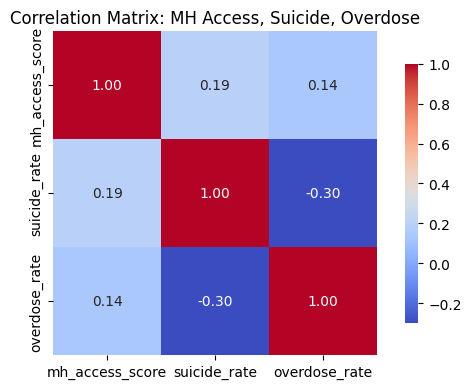

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Select and optionally normalize the numeric features ---
features = merged_df[["mh_access_score", "suicide_rate", "overdose_rate"]]

# Optionally standardize (uncomment if you want z-scores)
# scaler = StandardScaler()
# features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# --- Compute correlation matrix ---
corr = features.corr()

# --- Plot heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix: MH Access, Suicide, Overdose")
plt.tight_layout()

# --- Save to PNG ---
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()


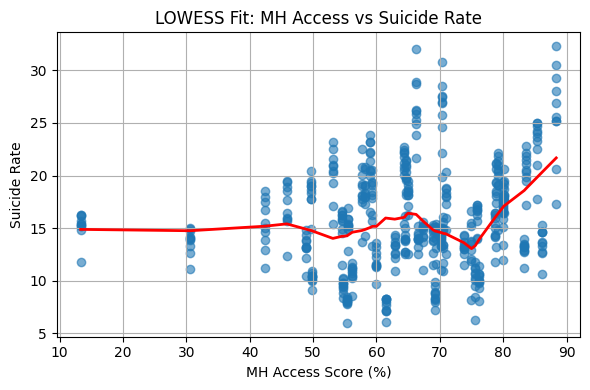

In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = merged_df["mh_access_score"]
y = merged_df["suicide_rate"]

lowess = sm.nonparametric.lowess(y, x, frac=0.3)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.6)
plt.plot(lowess[:, 0], lowess[:, 1], color="red", linewidth=2)
plt.xlabel("MH Access Score (%)")
plt.ylabel("Suicide Rate")
plt.title("LOWESS Fit: MH Access vs Suicide Rate")
plt.grid(True)
plt.tight_layout()

# Save to file
plt.savefig("lowess_suicide_vs_access.png", dpi=300)
plt.show()


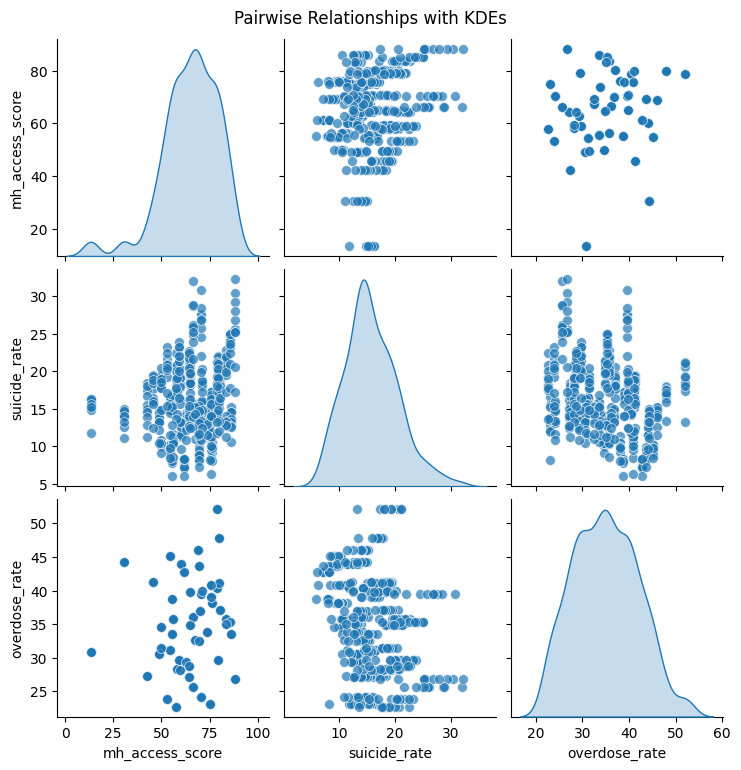

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create and save pairplot
pairplot = sns.pairplot(
    merged_df[["mh_access_score", "suicide_rate", "overdose_rate"]],
    kind="scatter",
    plot_kws={"alpha": 0.7, "s": 50},
    diag_kind="kde"
)
pairplot.fig.suptitle("Pairwise Relationships with KDEs", y=1.02)
pairplot.savefig("pairwise_kde_plot.png", dpi=300)
plt.show()
